In [65]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

In [66]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [67]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [68]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(pool_size=(2,2)), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(pool_size=(2,2)), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [69]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [70]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8768 - loss: 0.4146 - val_accuracy: 0.9744 - val_loss: 0.0850
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9690 - loss: 0.0992 - val_accuracy: 0.9812 - val_loss: 0.0635
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9814 - loss: 0.0609 - val_accuracy: 0.9888 - val_loss: 0.0384
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9860 - loss: 0.0458 - val_accuracy: 0.9902 - val_loss: 0.0302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9889 - loss: 0.0361 - val_accuracy: 0.9902 - val_loss: 0.0301


In [71]:
lenet_5_model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9775 - loss: 0.0644


[0.05489840731024742, 0.9812999963760376]

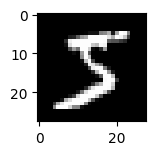

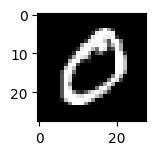

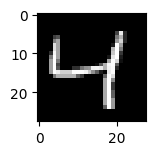

In [72]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [73]:
import os
lenet_5_model.save('/Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU/lenet_5_model.keras')
print(os.listdir('/Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU'))

['keywords.cu', 'my.h5', 'GPU_CPU_code3.cu', 'fashionmnist_model.json', '.DS_Store', 'FashionMNIST.weights.h5', 'devicequery.cu', 'GPU_CPU_code.cu', 'hello.cu', 'lenet_5_model.keras', 'part1.cu', 'train-images.idx3-ubyte', 'vector_add_2.cu', 'grid_kernel.cu', 'vector_add_1.cu', 'weights_txt_output', 'LeNet5.ipynb', 'vector_add_0.cu', 'part2.cu', 'GPU_CPU_code1.cu', 'vector_add_N_P.cu', '.git', 'printMNIST.cu', '.idea']


In [74]:
lenet_5_model.save("/Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU/my.h5")

In [75]:
lenet_5_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

In [76]:
json_model = lenet_5_model.to_json()

In [77]:
with open('/Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU/fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [78]:
lenet_5_model.save_weights('/Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU/FashionMNIST.weights.h5')

In [79]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[-1.76575094e-01, -1.15967222e-01, -8.38855747e-03,
           3.62583637e-01, -1.47033331e-03,  3.13598126e-01]],

        [[-1.25123277e-01, -3.59386988e-02,  3.31600159e-02,
           1.64143205e-01, -2.73069032e-02,  2.89176166e-01]],

        [[ 3.25984836e-01, -3.47942948e-01,  1.11996243e-03,
           2.10216030e-01,  2.03881785e-01, -1.80312395e-02]],

        [[ 5.49711049e-01, -1.42444909e-01, -5.87248914e-02,
           3.46905798e-01,  3.58579367e-01,  1.38296381e-01]],

        [[ 5.49404562e-01, -4.28216130e-01, -2.95643330e-01,
           3.66237611e-01,  2.31390730e-01, -1.62973702e-01]]],


       [[[ 2.50727702e-02, -2.41220072e-02,  1.39677227e-02,
          -1.76678896e-01, -1.85924061e-02,  4.13563550e-02]],

        [[ 6.98569641e-02, -2.33064041e-01, -4.87066358e-02,
          -1.55854017e-01, -5.20622618e-02,  6.51755603e-04]],

        [[ 3.60093385e-01, -2.96084106e-01, -2.48252749e-01,
           2.05862727e-02, -1.12802663e-03, -7.20615536e-02]],

In [80]:
import h5py
import numpy as np
import os

# Chemin vers le fichier contenant les poids
weights_file = '/Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU/FashionMNIST.weights.h5'
output_dir = '/Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU//weights_txt_output'

# Créer un dossier de sortie
os.makedirs(output_dir, exist_ok=True)

# Fonction récursive pour parcourir tous les groupes et sous-groupes
def process_group(group, path=""):
    for key in group.keys():
        item = group[key]
        current_path = f"{path}/{key}" if path else key

        if isinstance(item, h5py.Group):
            # Si c'est un groupe, continuer la récursion
            print(f"Found group: {current_path}")
            process_group(item, current_path)
        elif isinstance(item, h5py.Dataset):
            # Si c'est un dataset, vérifier s'il contient des données numériques
            data = np.array(item)
            if np.issubdtype(data.dtype, np.number):
                # Sauvegarder les données numériques dans un fichier texte
                file_path = os.path.join(output_dir, f"{current_path.replace('/', '_')}.txt")
                np.savetxt(file_path, data.flatten(), fmt='%.6f')
                print(f"Saved dataset: {current_path} -> {file_path}")
            else:
                print(f"Skipped non-numeric dataset: {current_path}")

# Ouvrir le fichier HDF5 et traiter son contenu
with h5py.File(weights_file, 'r') as f:
    process_group(f)

Found group: layers
Found group: layers/average_pooling2d
Found group: layers/average_pooling2d/vars
Found group: layers/average_pooling2d_1
Found group: layers/average_pooling2d_1/vars
Found group: layers/conv2d
Found group: layers/conv2d/vars
Saved dataset: layers/conv2d/vars/0 -> /Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU//weights_txt_output/layers_conv2d_vars_0.txt
Saved dataset: layers/conv2d/vars/1 -> /Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU//weights_txt_output/layers_conv2d_vars_1.txt
Found group: layers/conv2d_1
Found group: layers/conv2d_1/vars
Saved dataset: layers/conv2d_1/vars/0 -> /Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU//weights_txt_output/layers_conv2d_1_vars_0.txt
Saved dataset: layers/conv2d_1/vars/1 -> /Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU//weights_txt_output/layers_conv2d_1_vars_1.txt
Found group: layers/dense
Found group: layers/dense/vars
Saved dataset: laye

Magic Number: 2051, Number of Images: 60000, Rows: 28, Columns: 28


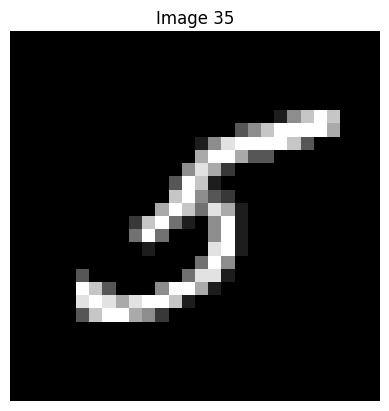

In [94]:
import struct
import numpy as np
import matplotlib.pyplot as plt

# Chemin vers le fichier MNIST
file_path = "/Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU/train-images.idx3-ubyte"

def read_image(file_path, index):
    # Lire l'en-tête du fichier
    with open(file_path, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        print(f"Magic Number: {magic}, Number of Images: {num_images}, Rows: {rows}, Columns: {cols}")

        # Calculer l'offset pour l'image souhaitée
        image_size = rows * cols
        f.seek(16 + index * image_size)  # Sauter l'en-tête et les images précédentes

        # Lire une image et la convertir en tableau numpy
        image = np.fromfile(f, dtype=np.uint8, count=image_size).reshape((rows, cols))
        return image

# Lire et afficher l'image
image_index = 35# Par exemple, lire l'image numéro 100
image = read_image(file_path, image_index)

# Normaliser l'image pour le modèle
normalized_image = image / 255.0
normalized_image = np.expand_dims(normalized_image, axis=0)  # Ajouter une dimension pour le batch
normalized_image = np.expand_dims(normalized_image, axis=-1)  # Ajouter une dimension pour les canaux

plt.imshow(image, cmap='gray')
plt.title(f"Image {image_index}")
plt.axis('off')
plt.show()

In [95]:
# Charger le modèle sauvegardé  
model_path = '/Users/jaheergoulam/CLionProjects/CNN-Implementation-LeNet-5-on-GPU/lenet_5_model.keras'
lenet_5_model = keras.models.load_model(model_path)

# Faire une prédiction sur l'image
predictions = lenet_5_model.predict(normalized_image)
predicted_class = np.argmax(predictions)

# Afficher les probabilités et la classe prédite
print("Probabilités :", predictions.flatten())
print("Classe prédite :", predicted_class)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Probabilités : [6.7175712e-08 1.4454372e-06 1.8706540e-08 1.1231908e-04 6.5005167e-07
 9.9982351e-01 2.1021783e-06 1.0176784e-07 7.3131723e-06 5.2535266e-05]
Classe prédite : 5
